In [0]:
import keras
from keras import layers
from keras import models
from keras.datasets import mnist
from matplotlib import pyplot as plt

In [0]:
# Load MNIST Data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [28]:
# Let's look at the data
print('train_data.shape:', train_data.shape)
print('test_data.shape:', test_data.shape)
print('train_labels.shape:', train_labels.shape)
print('test_labels.shape:', test_labels.shape)

train_data.shape: (60000, 28, 28)
test_data.shape: (10000, 28, 28)
train_labels.shape: (60000,)
test_labels.shape: (10000,)


In [0]:
# Keras wants input be of the form (height, width, num_channels)

train_data = train_data.reshape( (60000, 28, 28, 1) ).astype('float32')/255
test_data = test_data.reshape( (10000, 28, 28, 1) ).astype('float32')/255

# Also the labels must be converted into a one-hot form

from keras.utils import to_categorical


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [30]:
# Let's build our model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = models.Sequential()
model.add( Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)) )
model.add( MaxPooling2D((2, 2)) )
model.add( Conv2D(64, (3, 3), activation='relu') )
model.add( MaxPooling2D((2, 2)) )
model.add( Conv2D(64, (3, 3), activation='relu') )
model.add( Flatten() )
model.add( Dense(64, activation='relu') )
model.add( Dense(10, activation='softmax') )

print( model.summary() )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                36928     
__________

In [0]:
model.compile( loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'] )

In [32]:
history = model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 202us/step - loss: 0.1918 - acc: 0.9389 - val_loss: 0.0730 - val_acc: 0.9772
Epoch 2/10
48000/48000 [==============================] - 9s 198us/step - loss: 0.0501 - acc: 0.9844 - val_loss: 0.0523 - val_acc: 0.9853
Epoch 3/10
24384/48000 [==============>...............] - ETA: 4s - loss: 0.0359 - acc: 0.9886

48000/48000 [==============================] - 9s 196us/step - loss: 0.0343 - acc: 0.9896 - val_loss: 0.0533 - val_acc: 0.9844
Epoch 4/10
48000/48000 [==============================] - 9s 197us/step - loss: 0.0262 - acc: 0.9916 - val_loss: 0.0460 - val_acc: 0.9875
Epoch 5/10
48000/48000 [==============================] - 9s 197us/step - loss: 0.0210 - acc: 0.9934 - val_loss: 0.0438 - val_acc: 0.9882
Epoch 6/10
 1664/48000 [>.............................] - ETA: 8s - loss: 0.0132 - acc: 0.9940

48000/48000 [==============================] - 9s 197us/step - loss: 0.0163 - acc: 0.9948 - val_loss: 0.0462 - val_acc: 0.9870
Epoch 7/10
48000/48000 [==============================] - 9s 198us/step - loss: 0.0140 - acc: 0.9962 - val_loss: 0.0405 - val_acc: 0.9902
Epoch 8/10
45120/48000 [===========================>..] - ETA: 0s - loss: 0.0100 - acc: 0.9968

48000/48000 [==============================] - 9s 197us/step - loss: 0.0102 - acc: 0.9968 - val_loss: 0.0570 - val_acc: 0.9871
Epoch 9/10
48000/48000 [==============================] - 9s 195us/step - loss: 0.0097 - acc: 0.9974 - val_loss: 0.0510 - val_acc: 0.9902
Epoch 10/10
48000/48000 [==============================] - 9s 196us/step - loss: 0.0083 - acc: 0.9975 - val_loss: 0.0515 - val_acc: 0.9897


In [0]:
def plot_history(history):
  ''' Plot loss and accuracy plots for both training and validation. '''
  
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  epochs = range(1, len(acc)+1)
  
  plt.plot(epochs, acc, 'bo', label='Traininig Accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
  plt.title('Accuracy vs Epochs')
  plt.legend()
  plt.show()
  
  plt.plot(epochs, loss, 'ro', label='Training Loss')
  plt.plot(epochs,  val_loss, 'r', label='Validation Loss')
  plt.legend()
  plt.title('Loss vs Epochs')
  plt.show()

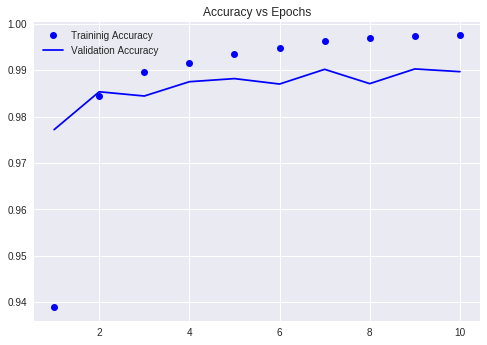

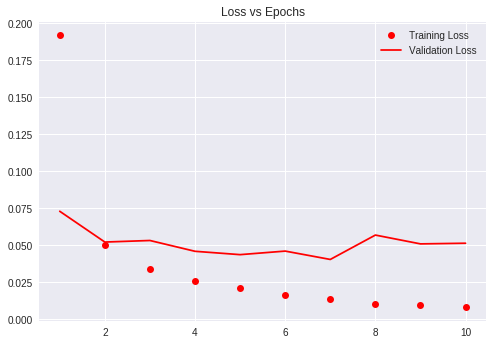

In [34]:
plot_history(history)

In [35]:
# Let's try a model with Dropout

from keras.layers import Dropout

model = models.Sequential()
model.add( Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)) )
model.add( MaxPooling2D((2, 2)) )
model.add( Conv2D(64, (3, 3), activation='relu') )
model.add( MaxPooling2D((2, 2)) )
model.add( Conv2D(64, (3, 3), activation='relu') )
model.add( Flatten() )
model.add( Dropout(0.5) )
model.add( Dense(64, activation='relu') )
model.add( Dense(10, activation='softmax') )

print( model.summary() )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 576)               0         
__________

In [0]:
model.compile( loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'] )

In [38]:
history = model.fit(train_data, train_labels, epochs=20, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 10s 201us/step - loss: 0.0852 - acc: 0.9729 - val_loss: 0.0442 - val_acc: 0.9869
Epoch 2/20
48000/48000 [==============================] - 10s 204us/step - loss: 0.0594 - acc: 0.9807 - val_loss: 0.0398 - val_acc: 0.9887
Epoch 3/20
21440/48000 [============>.................] - ETA: 5s - loss: 0.0476 - acc: 0.9849

48000/48000 [==============================] - 10s 205us/step - loss: 0.0489 - acc: 0.9847 - val_loss: 0.0420 - val_acc: 0.9868
Epoch 4/20
48000/48000 [==============================] - 10s 199us/step - loss: 0.0419 - acc: 0.9866 - val_loss: 0.0347 - val_acc: 0.9904
Epoch 5/20
48000/48000 [==============================] - 10s 202us/step - loss: 0.0353 - acc: 0.9889 - val_loss: 0.0337 - val_acc: 0.9911
Epoch 6/20
   64/48000 [..............................] - ETA: 12s - loss: 0.0037 - acc: 1.0000

48000/48000 [==============================] - 10s 204us/step - loss: 0.0323 - acc: 0.9898 - val_loss: 0.0370 - val_acc: 0.9898
Epoch 7/20
48000/48000 [==============================] - 10s 202us/step - loss: 0.0296 - acc: 0.9909 - val_loss: 0.0331 - val_acc: 0.9911
Epoch 8/20
43648/48000 [==========================>...] - ETA: 0s - loss: 0.0262 - acc: 0.9916

48000/48000 [==============================] - 10s 201us/step - loss: 0.0267 - acc: 0.9916 - val_loss: 0.0321 - val_acc: 0.9908
Epoch 9/20
48000/48000 [==============================] - 10s 200us/step - loss: 0.0255 - acc: 0.9924 - val_loss: 0.0347 - val_acc: 0.9902
Epoch 10/20
48000/48000 [==============================] - 10s 202us/step - loss: 0.0249 - acc: 0.9927 - val_loss: 0.0373 - val_acc: 0.9918
Epoch 11/20
 3200/48000 [=>............................] - ETA: 8s - loss: 0.0230 - acc: 0.9922

48000/48000 [==============================] - 9s 198us/step - loss: 0.0221 - acc: 0.9929 - val_loss: 0.0391 - val_acc: 0.9926
Epoch 12/20
48000/48000 [==============================] - 10s 199us/step - loss: 0.0226 - acc: 0.9935 - val_loss: 0.0385 - val_acc: 0.9911
Epoch 13/20
44864/48000 [===========================>..] - ETA: 0s - loss: 0.0208 - acc: 0.9935

48000/48000 [==============================] - 10s 200us/step - loss: 0.0206 - acc: 0.9935 - val_loss: 0.0358 - val_acc: 0.9918
Epoch 14/20
48000/48000 [==============================] - 10s 200us/step - loss: 0.0209 - acc: 0.9936 - val_loss: 0.0347 - val_acc: 0.9921
Epoch 15/20
48000/48000 [==============================] - 10s 201us/step - loss: 0.0199 - acc: 0.9941 - val_loss: 0.0391 - val_acc: 0.9911
Epoch 16/20
 3392/48000 [=>............................] - ETA: 8s - loss: 0.0168 - acc: 0.9929

48000/48000 [==============================] - 10s 202us/step - loss: 0.0199 - acc: 0.9938 - val_loss: 0.0356 - val_acc: 0.9918
Epoch 17/20
48000/48000 [==============================] - 10s 199us/step - loss: 0.0173 - acc: 0.9948 - val_loss: 0.0455 - val_acc: 0.9903
Epoch 18/20
44736/48000 [==========================>...] - ETA: 0s - loss: 0.0199 - acc: 0.9941

48000/48000 [==============================] - 10s 200us/step - loss: 0.0193 - acc: 0.9942 - val_loss: 0.0414 - val_acc: 0.9927
Epoch 19/20
48000/48000 [==============================] - 10s 200us/step - loss: 0.0193 - acc: 0.9942 - val_loss: 0.0339 - val_acc: 0.9928
Epoch 20/20
48000/48000 [==============================] - 10s 199us/step - loss: 0.0176 - acc: 0.9950 - val_loss: 0.0346 - val_acc: 0.9921


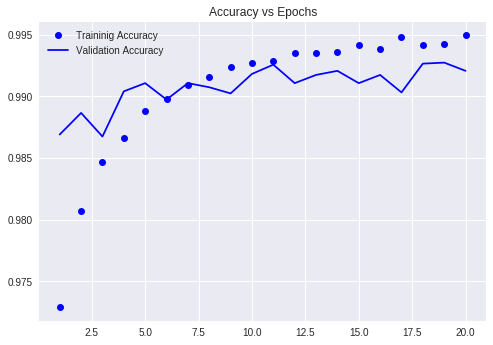

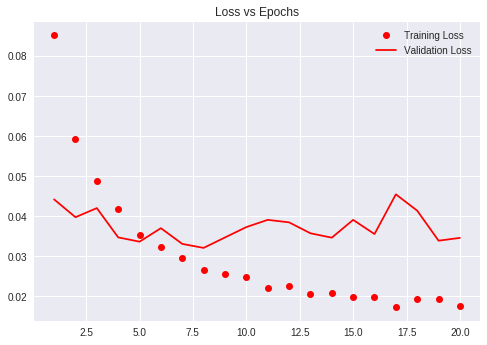

In [39]:
plot_history(history)